<a href="https://colab.research.google.com/github/fatmaT2001/Machinelearning-project-/blob/main/Answer_of_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,GridSearchCV


# 1.  Perform  data analysis as follows:


##   - Propose at least 2 questions about the dataset.


1. How does the occurrence of heart disease vary with age?

2. What is the relationship between maximum heart rate (thalach) and heart disease?



## Use visualizations and relations between variables to support your analysis in answering these questions.

In [ ]:
df=pd.read_csv('heart_disease.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


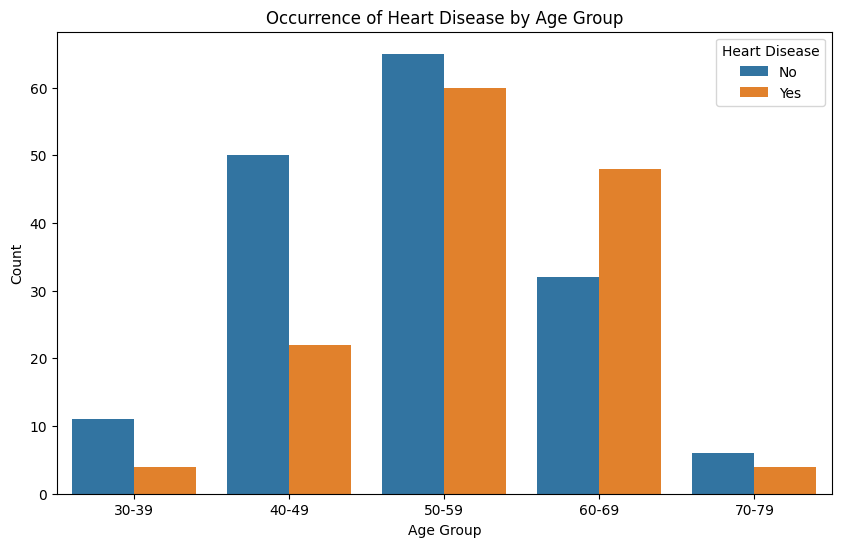

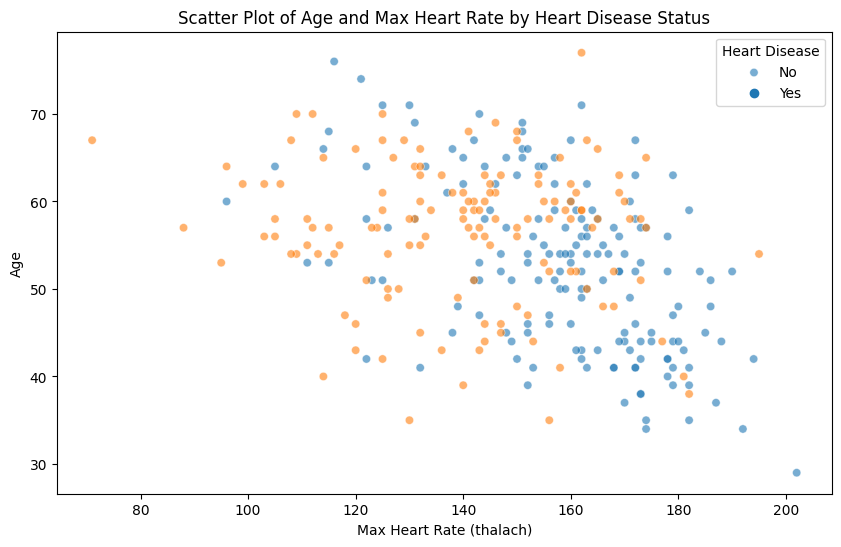

In [ ]:
bins = [29, 39, 49, 59, 69, 79]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
age_groups = pd.cut(df['age'], bins=bins, labels=labels)

# Create a bar chart for the occurrence of heart disease by age group
plt.figure(figsize=(10, 6))
# Use the `age_groups` series directly here instead of adding it to the dataframe
sns.countplot(x=age_groups, hue=df['target'])
plt.title('Occurrence of Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Create a scatter plot of age against maximum heart rate (thalach) by heart disease status
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['thalach'], y=df['age'], hue=df['target'], alpha=0.6)
plt.title('Scatter Plot of Age and Max Heart Rate by Heart Disease Status')
plt.xlabel('Max Heart Rate (thalach)')
plt.ylabel('Age')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


##  - Perform any necessary cleaning steps, scaling ...etc.


In [ ]:

## non binary data


# After this transformation, 'sex' will be 1 for 'female' and 0 for 'male',
# and 'target' will be 1 for 'yes' and 0 for 'no'
ohe_target = OneHotEncoder(sparse=False, drop='if_binary')
df['target'] = ohe_target.fit_transform(df[['target']])
ohe_sex = OneHotEncoder(sparse=False, drop='if_binary')
df['sex'] = ohe_sex.fit_transform(df[['sex']])
# Drop columns with any null values
df = df.dropna(axis=1)

# Drop duplicated rows
df = df.drop_duplicates()

df.head()




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unnamed: 0,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,0,63,1.0,3,1,0,0,2.3,0,0,1,1.0
1,1,37,1.0,2,0,1,0,3.5,0,0,2,1.0
2,2,41,0.0,1,0,0,0,1.4,2,0,2,1.0
3,3,56,1.0,1,0,1,0,0.8,2,0,2,1.0
4,4,57,0.0,0,0,1,1,0.6,2,0,2,1.0


# ML Models

In [ ]:

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train

132    1.0
202    0.0
196    0.0
75     1.0
176    0.0
      ... 
188    0.0
71     1.0
106    1.0
270    0.0
102    1.0
Name: target, Length: 242, dtype: float64

## 2. Design two different neural networks by Keras API


### first module

In [ ]:

# Define the first neural network
model1 = Sequential()
model1.add(Dense(64, input_dim=11, activation='relu'))  # Input layer and first hidden layer
model1.add(Dense(32, activation='relu'))  # Second hidden layer
model1.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the first model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the first model
model1.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
25/25 [==============================] - 1s 1ms/step - loss: 0.4409 - accuracy: 0.8223
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8595
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8719
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.9008
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9256
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8678
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.8967
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1852 - accuracy: 0.9132
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9256
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9545
Epoch 11/50
25/25 [

In [ ]:

# Get the predicted probabilities for the positive class
predicted_probs = model1.predict(X_test)

# Convert predicted probabilities to binary predictions
predicted_classes = (predicted_probs > 0.5).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predicted_classes)

print(f'Model 1 Accuracy: {accuracy}')


2/2 [==============================] - 0s 5ms/step
Model 1 Accuracy: 0.9836065573770492


### Second Model

In [ ]:
# Define the second neural network with a different architecture
model2 = Sequential()
model2.add(Dense(64, input_dim=11, activation='relu'))  # Input layer and first hidden layer
model2.add(Dense(32, activation='relu'))  # Second hidden layer
model2.add(Dense(16, activation='relu'))  # Third hidden layer
model2.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the second model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the second model
model2.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.3236 - accuracy: 0.8512
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.8967
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.8967
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.8967
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9091
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.8967
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9091
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9050
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.8967
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9091
Epoch 11/

In [ ]:
# Get the predicted probabilities for the positive class
predicted_probs = model2.predict(X_test)

# Convert predicted probabilities to binary predictions
predicted_classes = (predicted_probs > 0.5).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predicted_classes)

print(f'Model 2 Accuracy: {accuracy}')


2/2 [==============================] - 0s 5ms/step
Model 2 Accuracy: 0.9672131147540983


## KNN

In [ ]:
import numpy as np
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best value of k (number of neighbors)
param_grid = {'n_neighbors': np.arange(4, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# Fit the model on the training data
knn_gscv.fit(X_train, y_train)

# Get the best performing number of neighbors
best_k = knn_gscv.best_params_['n_neighbors']

# Set up the KNN classifier with the best number of neighbors
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model on the training data
knn_best.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_best.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Best K: {best_k}")
print(f"Test Set Accuracy: {accuracy}")

Best K: 4
Test Set Accuracy: 1.0


## Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")


Logistic Regression Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model with specified kernel, alpha, and C
svc = SVC(kernel='rbf', C=1.0)

# Train the model
svc.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc}")


SVM Accuracy: 1.0


##Naive Bayes Classifier


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred_nb = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")


Naive Bayes Accuracy: 0.9672131147540983


## K-mean

Since K-Means is unsupervised, the cluster labels won't directly correspond to the  target labels

Due to the above, calculating accuracy might not be meaningful for K-Means in this context

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Assuming the train and test sets are already defined: X_train, X_test, y_train, y_test
n_clusters = 2  # For example, we use 2 clusters to represent a binary classification problem

# Initialize K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

# Predict clusters on both training and test data
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Create a mapping from clusters to class labels using the majority class in each cluster from the training data
cluster_to_class_mapping = {}
for cluster_label in range(n_clusters):
    # Find the majority class in the cluster
    cluster_mask = (train_clusters == cluster_label)
    majority_class = y_train[cluster_mask].mode().values[0]
    cluster_to_class_mapping[cluster_label] = majority_class

# Map the test clusters to class labels
mapped_test_labels = [cluster_to_class_mapping[cluster] for cluster in test_clusters]

# Calculate accuracy
accuracy = accuracy_score(y_test, mapped_test_labels)
print(f"K-Means Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Accuracy: 0.9836065573770492
